In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch


In [2]:
d_sorts = ["CD-GraB", "D-RR", "I-B", "I-PB"]


In [3]:
def exp_maker(n, sorter, seed):
    return f"{sorter}-node-{n}-lr-0.001-B-{n}-seed-{seed}"


In [4]:
B = [4, 8, 16, 32, 64]
results = {node: {s: [] for s in d_sorts} for node in B}

for s in d_sorts:
    for node in B:
        for seed in range(3):
            exp_details = exp_maker(node, s, seed)
            exp_folder = f"..{os.sep}..{os.sep}results{os.sep}lenet-cifar10-sim-1{os.sep}{exp_details}"
            r = torch.load(f"{exp_folder}{os.sep}results.pt", map_location='cpu')
            results[node][s].append(r)


In [5]:
B = [4, 8, 16, 32, 64]
herding_results = {node: {s: [] for s in d_sorts} for node in B}

for s in d_sorts:
    for node in B:
        for seed in range(3):
            exp_details = exp_maker(node, s, seed)
            exp_folder = f"..{os.sep}..{os.sep}results{os.sep}lenet-cifar10-sim-1{os.sep}{exp_details}"
            r = torch.load(f"{exp_folder}{os.sep}parallel_herding_bounds.pt")
            herding_results[node][s].append(r)


In [6]:
def down_sampling(len_sampling, data):
    start = 0
    end = len_sampling
    len_data = len(data)
    ret = []
    while end <= len_data:
        data_chunk = data[start:end]
        start += len_sampling
        end += len_sampling
        ret.append(torch.mean(torch.as_tensor(data_chunk)))
    return torch.as_tensor(ret)


In [7]:
def plot_res(ax, s, label, train_test, loss_acc, node, color=None):
    res = []
    for arr in results[node][s]:
        if train_test == 'train':
            res.append(torch.tensor(arr[train_test][loss_acc]))
        else:
            res.append(torch.tensor(arr[train_test][loss_acc]))
    end_pos = len(torch.tensor(results[node][s][0][train_test][loss_acc])) + 1
    res = torch.vstack(res).numpy()
    mean = res.mean(axis=0)
    std = res.std(axis=0)
    if color:
        ax.plot(np.arange(1, end_pos, 1), mean, label=label, markersize=5, color=color, linewidth=1)    
    else:
        ax.plot(np.arange(1, end_pos, 1), mean, label=label, markersize=5, linewidth=1)    
    ax.fill_between(
        np.arange(1, end_pos, 1), (mean - std), (mean + std), alpha=0.1)


/tmp/ipykernel_925452/3303729414.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


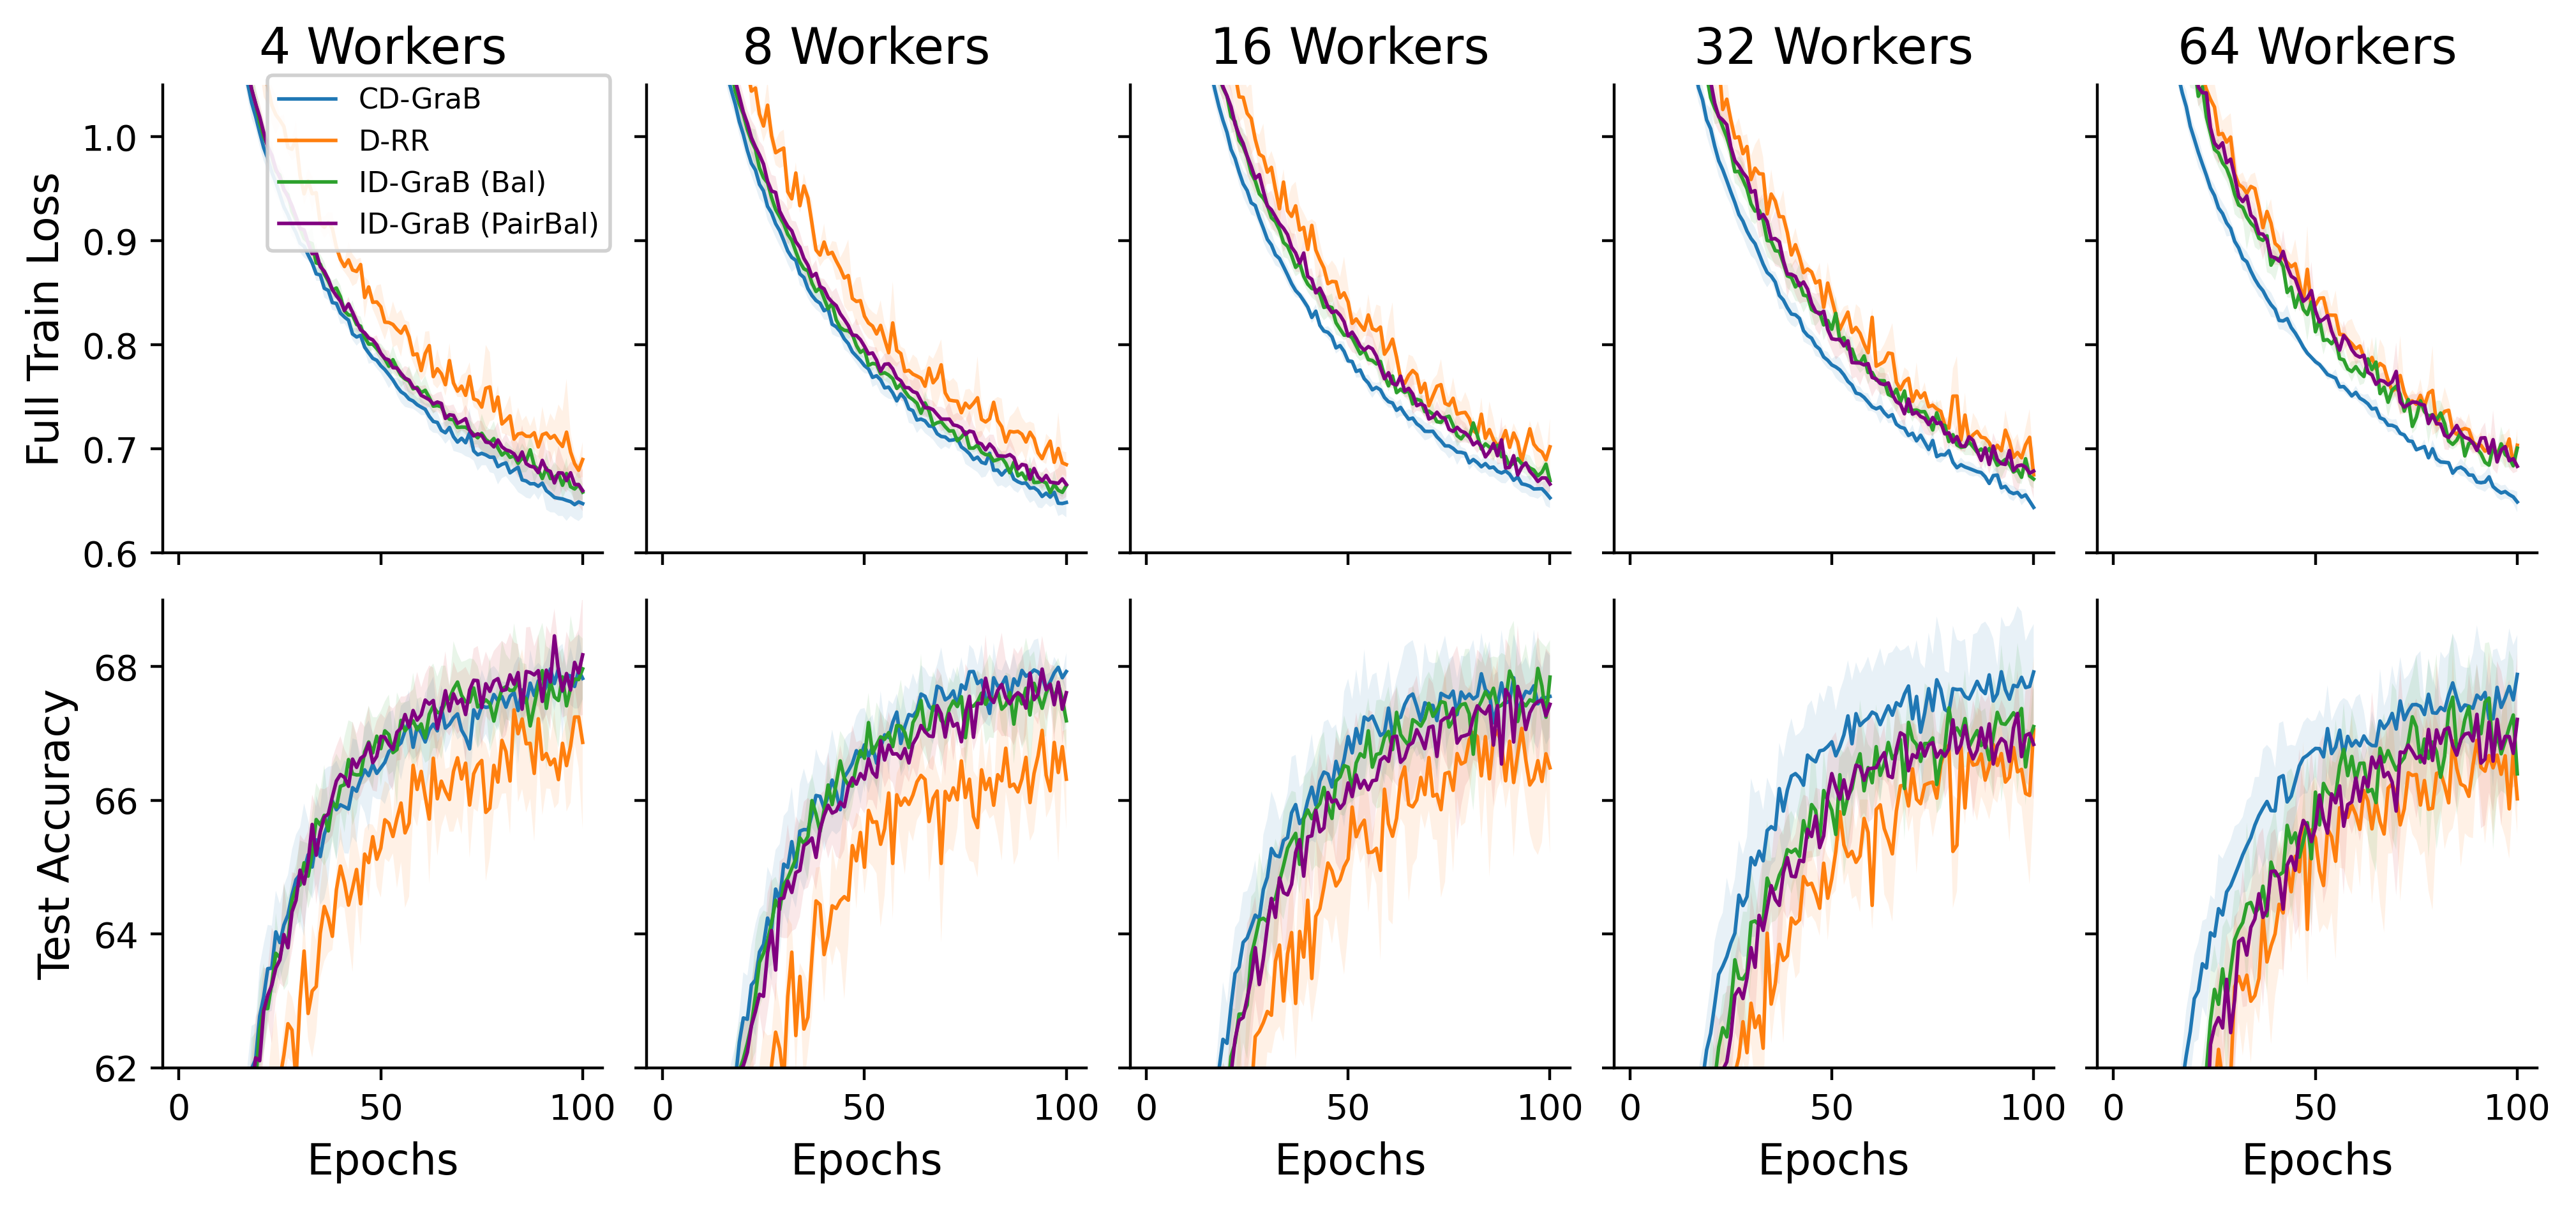

In [8]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(12, 5), dpi=400, gridspec_kw=dict(wspace=0.1, hspace=0.1), sharex=True)

for i, b in enumerate(B):
  plot_res(axes[0, i], "CD-GraB", "CD-GraB", "train", 'loss', b)
  plot_res(axes[0, i], "D-RR", "D-RR", "train", 'loss', b)
  plot_res(axes[0, i], "I-B", "ID-GraB (Bal)", "train", 'loss', b)
  plot_res(axes[0, i], "I-PB", "ID-GraB (PairBal)", "train", 'loss', b, color='purple')
  if i > 0:
    axes[0, i].set_yticklabels([])
  axes[0, i].set_ylim(0.6, 1.05)
  axes[0, 0].set_ylabel('Full Train Loss', fontsize=12)

  if i > 0:
    axes[1, i].set_yticklabels([])
  axes[1, i].set_ylim(62, 69)
  # axes[1, 0].set_yticklabels(['82.0', ])
  axes[1, i].set_xlabel('Epochs', fontsize=12)
  axes[1, 0].set_ylabel('Test Accuracy', fontsize=12)
  axes[0, i].set_title(f'{b} Workers', fontsize=14)
  axes[0, i].spines[['right', 'top']].set_visible(False)
  axes[1, i].spines[['right', 'top']].set_visible(False)

axes[0, 0].legend(fontsize=8, loc='upper right', framealpha=.9, bbox_to_anchor=(1.05, 1.05))
fig.tight_layout()
# fig.savefig(f'..{os.sep}..{os.sep}graph{os.sep}lenet-sim.png')
# fig.savefig(f'..{os.sep}..{os.sep}graph{os.sep}lenet-sim.pdf', format="pdf", bbox_inches="tight")

In [9]:
def down_sampling(len_sampling, data):
    start = 0
    end = len_sampling
    len_data = len(data)
    ret = []
    while end <= len_data:
        data_chunk = data[start:end]
        start += len_sampling
        end += len_sampling
        ret.append(torch.mean(data_chunk))
    return torch.tensor(ret)

In [30]:
def plot_herding(ax, s, label, node, color=None):
    res = []
    for arr in results[node][s]:
        res.append(down_sampling(2, torch.tensor(arr['parallel_herding_bounds'])))
    end_pos = 101
    res = torch.vstack(res).numpy()
    mean = res.mean(axis=0)
    std = res.std(axis=0)
    if color:
        ax.plot(np.arange(1, end_pos, 2), mean, label=label, markersize=5, color=color, linewidth=1)    
    else:
        ax.plot(np.arange(1, end_pos, 2), mean, label=label, markersize=5, linewidth=1)    
    ax.fill_between(np.arange(1, end_pos, 2), (mean - std), (mean + std), alpha=0.1)


/tmp/ipykernel_925452/2789763101.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


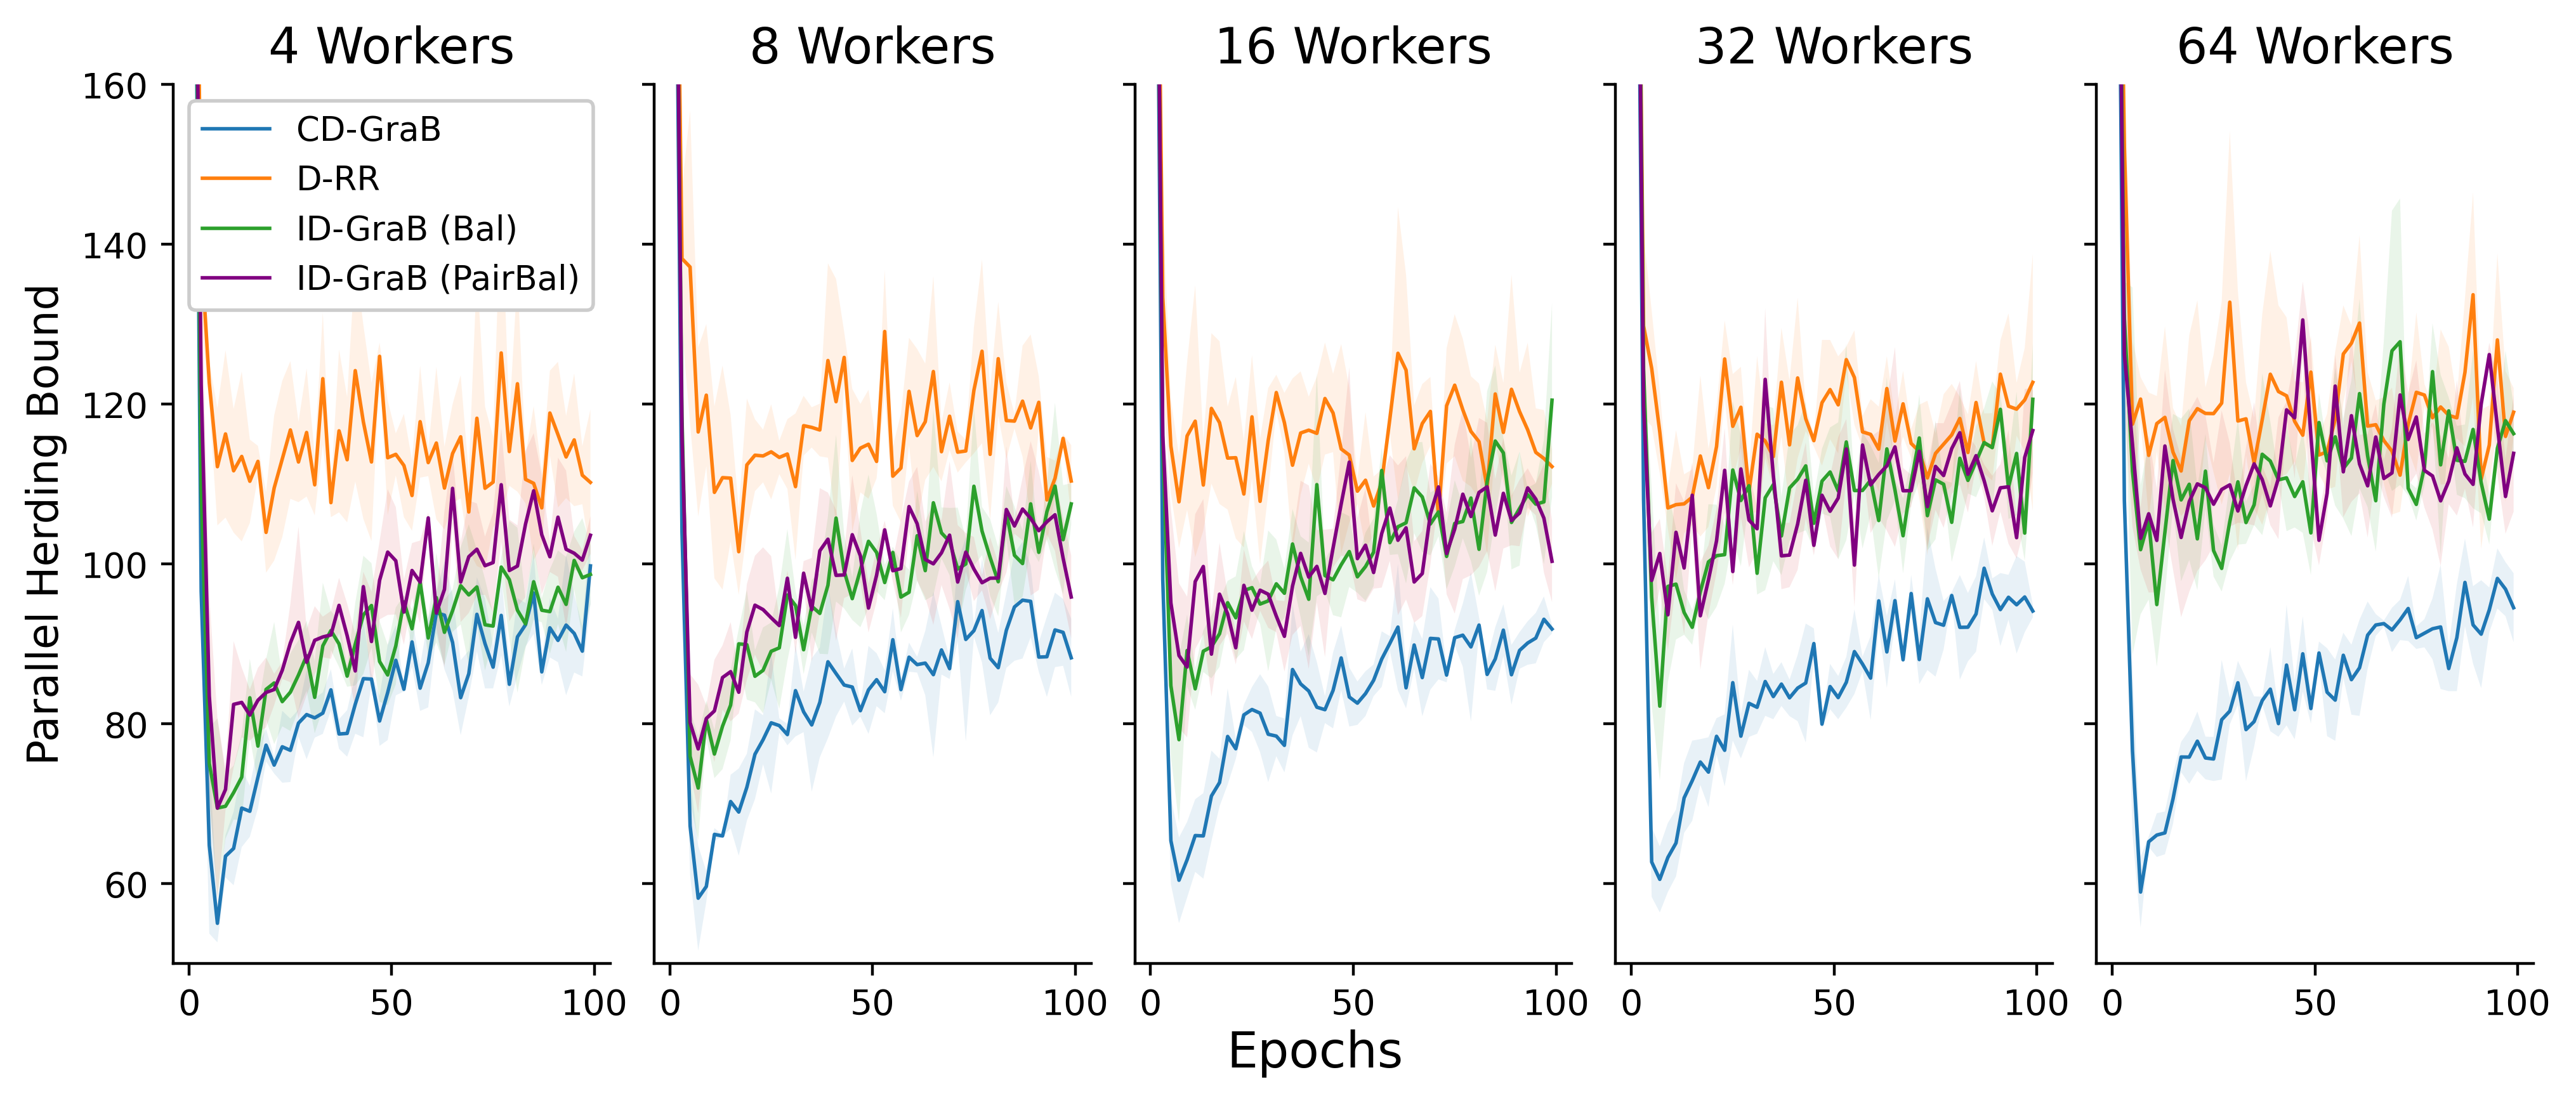

In [38]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(12, 4.5), dpi=400, gridspec_kw=dict(wspace=0.1, hspace=0.1), sharex=True)

for i, b in enumerate(B):
  plot_herding(axes[i], "CD-GraB", "CD-GraB", b)
  plot_herding(axes[i], "D-RR", "D-RR", b)
  plot_herding(axes[i], "I-B", "ID-GraB (Bal)", b)
  plot_herding(axes[i], "I-PB", "ID-GraB (PairBal)", b, color='purple')
  if i > 0:
    axes[i].set_yticklabels([])

  axes[0].set_ylabel('Parallel Herding Bound', fontsize=12)
  axes[i].set_title(f'{b} Workers', fontsize=14)
  axes[i].spines[['right', 'top']].set_visible(False)
  axes[i].set_ylim(50, 160)
fig.supxlabel('Epochs', fontsize=14)
axes[0].legend(fontsize=9.5, loc='upper right',
                  framealpha=1)
fig.tight_layout()
fig.savefig(f'..{os.sep}..{os.sep}graph{os.sep}lenet-sim-parallel-herding-new.png')
fig.savefig(f'..{os.sep}..{os.sep}graph{os.sep}lenet-sim-parallel-herding-new.pdf', format="pdf", bbox_inches="tight")
